In [114]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

students_df = pd.read_csv('students_performance.csv')
print(students_df.head(5))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [79]:
 #info block
end_str = '\n' + '=' * 50 + '\n'

print(students_df.info(), end=end_str)

#строки столбцы
print(students_df.shape, end=end_str)
print(students_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
(1000, 8)
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                s

In [146]:
#работа с столбцами переименовать в стиль питона
col = students_df.columns
col = col.str.replace(' ', '_').str.lower()
students_df.columns = col
students_df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [147]:
#чистка от дубликатов и пропусков
if students_df.duplicated().any():
    print(f'🔁 Найдено {students_df.duplicated().sum()} дубликатов.')
    df = students_df.drop_duplicates().reset_index(drop=True)
    print('✅ Дубликаты удалены.')
else:
    print('👌 Дубликатов не найдено.')

print(students_df.isna().sum())


👌 Дубликатов не найдено.
gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


gender
female    518
male      482
Name: count, dtype: int64


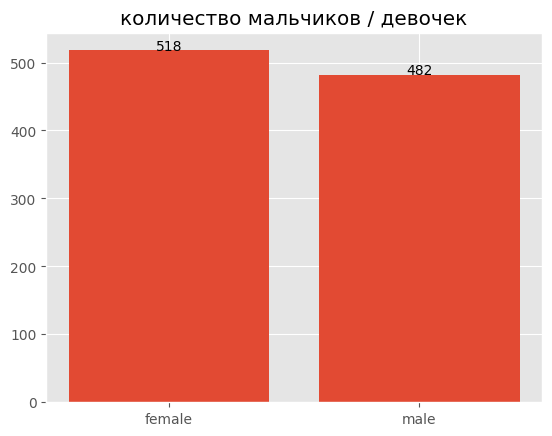

In [149]:
#визуализирую количество мальчиков / девочек
gender_ser = students_df['gender']
# print(gender_ser.unique())
ob_values = gender_ser.value_counts()
print(ob_values)

categories = ob_values.index
values = ob_values.values

plt.bar(categories, values)
for i, v in enumerate(values):
    plt.text(i, v + 0.2, str(v), ha='center')
plt.title('количество мальчиков / девочек')
plt.show()


race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


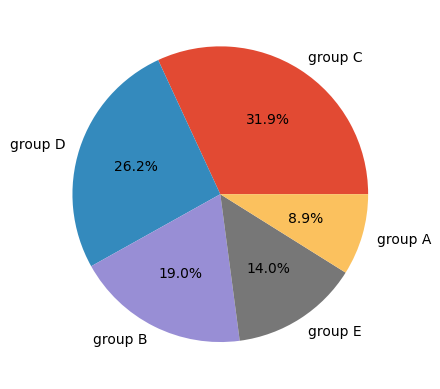

In [150]:
#соотношение расс в процентах
gender_ser = students_df['race/ethnicity']
gender_ser = gender_ser.value_counts()
print(gender_ser)

categories = gender_ser.index
values = gender_ser.values

plt.pie(values, labels=categories, autopct='%1.1f%%')
plt.show()


In [151]:
students_df


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [207]:
#средний общий бал по больнице и у каждой рассы

# Средние баллы по расам
mean_scores_table = students_df.groupby('race/ethnicity').agg(
    mean_math_score=('math_score', 'mean'),
    mean_reading_score=('reading_score', 'mean'),
    mean_writing_score=('writing_score', 'mean')
)
# mean_scores_table.set_index('race/ethnicity', inplace=True)
# Среднее по всем расам и предметам (средний по больнице)
mean_scores_full = mean_scores_table.mean(axis=1).mean()
print(f'mean_scores_to school = {mean_scores_full.round(2)}')

# Среднее по расам (Series)
mean_scores_group = mean_scores_table.mean(axis=1).round(2)

# Добавляем колонку с % от среднего по больнице
mean_scores_group = mean_scores_group.reset_index(name='mean_scores')
# print(mean_scores_group)

mean_scores_group['percent_of_school'] = (mean_scores_group['mean_scores'] / mean_scores_full * 100).round(2)
print(mean_scores_group['percent_of_school'].dtype)
mean_scores_group['percent_of_school'] = (mean_scores_group['percent_of_school'] - 100).round(2).astype(str) + '%'
print(mean_scores_group)


mean_scores_to school = 67.5
float64
  race/ethnicity  mean_scores percent_of_school
0        group A        62.99            -6.69%
1        group B        65.47            -3.01%
2        group C        67.13            -0.56%
3        group D        69.18             2.48%
4        group E        72.75             7.77%


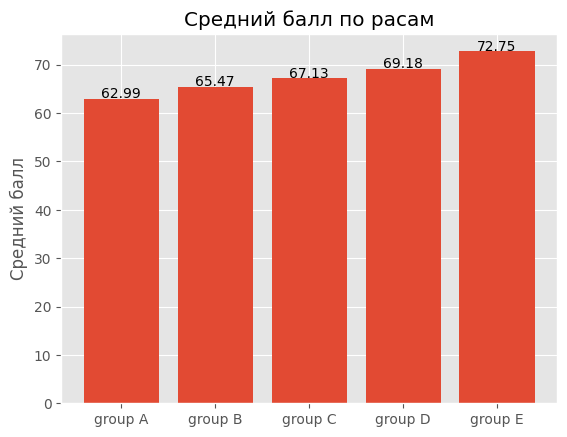

In [208]:
 # Столбчатая диаграмма среднего по группе
plt.bar(mean_scores_group['race/ethnicity'], mean_scores_group['mean_scores'])

for i, v in enumerate(mean_scores_group['mean_scores']):
    plt.text(i, v + 0.2, str(v), ha='center')

plt.ylabel('Средний балл')
plt.title('Средний балл по расам')
plt.show()